In [42]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

#### Загружаем датасет и добавляем в него скорость ветра

In [47]:
ds = xr.load_dataset (r'D:\!Work\!git\Lectures\Urban-climate-modelling4HSE\Practice\ERA5_example\Moscow 2022.nc')


ds['vel10'] = np.sqrt (ds['u10']**2 + ds['v10']**2)
display(ds)

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 17, time: 8760)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 58.0 57.75 57.5 57.25 ... 54.5 54.25 54.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 2.176 2.217 ... 2.312 2.246
    v10        (time, latitude, longitude) float32 -0.1972 -0.2404 ... 2.976
    d2m        (time, latitude, longitude) float32 272.1 272.1 ... 272.9 273.2
    t2m        (time, latitude, longitude) float32 273.0 273.0 ... 273.7 273.8
    blh        (time, latitude, longitude) float32 432.9 442.9 ... 408.6 414.1
    msl        (time, latitude, longitude) float32 1.001e+05 ... 1.018e+05
    ...         ...
    sp         (time, latitude, longitude) float32 9.94e+04 ... 1.002e+05
    ssrd       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    strd       (time, latitude, longitude) float32 1.086e+06 ... 1.059e+06
    tp         (time, latitude, longitude) float32 7.147e-06 ... 2.924e-06
    fdir       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    vel10      (time, latitude, longitude) float32 2.185 2.23 ... 3.942 3.728
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-26 19:24:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


#### Выбираем данные за июнь и осредняем их по времени


In [48]:
ds_cr = ds.where(ds['time'].dt.month == 6)
ds_mean = ds_cr.mean(dim = 'time')

#### Рисуем пространственное распределение осредненных значений

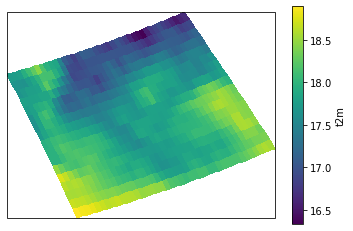

In [49]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Orthographic(0, 30)))

(ds_mean['t2m']-273.15).plot(ax=axis, transform=ccrs.PlateCarree())
axis.coastlines()

#### Выбираем данные для ячейки, ближайшей к заданным координатам, и строим график

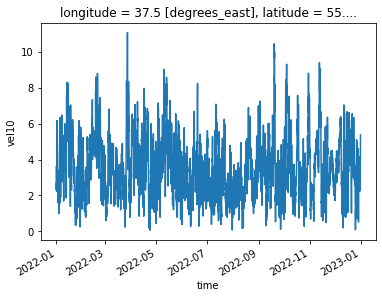

In [50]:
ds4point = ds.sel (longitude = 37.5, latitude = 55.6, method = 'nearest')
ds4point['vel10'].plot()

#### Конвертируем данные для точки в pandas DataFrame, чтобы можно было работать с ними так же, как с данными наблюдений ранее

In [51]:
df4point = ds4point.to_dataframe()
display(df4point.head())

,longitude,latitude,u10,v10,d2m,t2m,blh,msl,ptype,sp,ssrd,strd,tp,fdir,vel10
time,,,,,,,,,,,,,,,
2022-01-01 00:00:00,37.5,55.5,2.718058,2.350349,270.878662,271.356262,365.950684,100140.835938,4.999985,97967.054688,0.0,1094955.500,0.000186,0.0,3.593324
2022-01-01 01:00:00,37.5,55.5,2.638202,2.037459,271.008331,271.412048,334.958130,100085.531250,4.999985,97914.187500,0.0,1099228.875,0.000145,0.0,3.333369
2022-01-01 02:00:00,37.5,55.5,2.728176,1.318424,271.444397,271.698425,317.329712,100037.765625,4.999985,97868.765625,0.0,1105446.125,0.000109,0.0,3.030047
2022-01-01 03:00:00,37.5,55.5,2.637479,0.724457,271.481445,271.743073,286.701050,100030.476562,4.999985,97863.218750,0.0,1101187.500,0.000087,0.0,2.735166
2022-01-01 04:00:00,37.5,55.5,2.495111,0.292164,271.537781,271.806305,255.292358,100016.554688,4.999985,97849.343750,0.0,1098353.500,0.000062,0.0,2.512158
